In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import statistics  as sts

In [2]:
base = pd.read_csv('slr12.csv', sep=";")
base.shape

(36, 2)

In [3]:
base.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


Text(0.5, 1.0, 'Árvores')

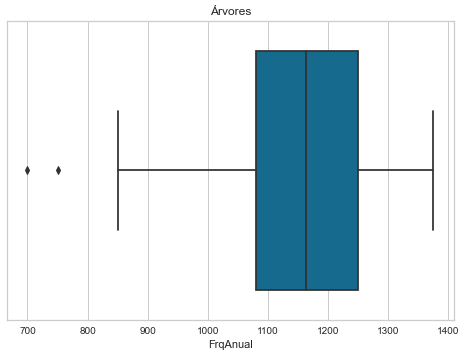

In [4]:
srn.boxplot(base.FrqAnual).set_title('Árvores')

In [5]:
base.loc[(base['FrqAnual'] <  1000 )]

,FrqAnual,CusInic
30,750,1250
32,700,1300
33,900,1250
34,900,1300
35,850,1200


In [6]:
mediana = sts.median(base['FrqAnual'])
mediana

1162.5

In [7]:
base.loc[(base['FrqAnual'] <  1000 )] = mediana

In [8]:
base.loc[(base['FrqAnual'] < 1000 )]

,FrqAnual,CusInic


In [9]:
X = base.iloc[:, 1].values
y = base.iloc[:, 0].values
y

array([1000. , 1125. , 1087. , 1070. , 1100. , 1150. , 1250. , 1150. ,
       1100. , 1350. , 1275. , 1375. , 1175. , 1200. , 1175. , 1300. ,
       1260. , 1330. , 1325. , 1200. , 1225. , 1090. , 1075. , 1080. ,
       1080. , 1180. , 1225. , 1175. , 1250. , 1250. , 1162.5, 1125. ,
       1162.5, 1162.5, 1162.5, 1162.5])

In [10]:
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.70950277],
       [0.70950277, 1.        ]])

In [11]:
X = X.reshape(-1, 1)

modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [12]:
modelo.intercept_

571.1146363749718

In [13]:
modelo.coef_

array([0.47845475])

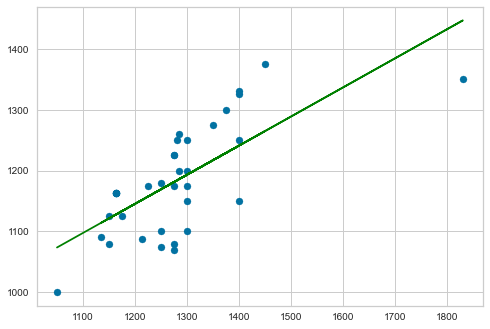

In [14]:
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'green')

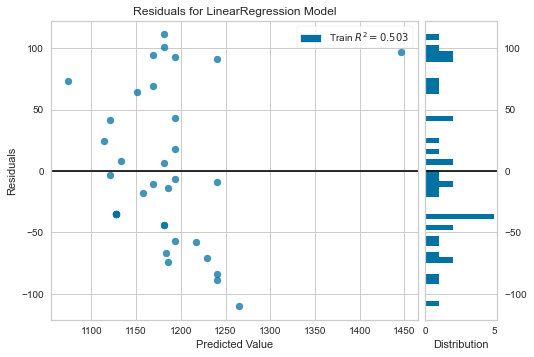

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [16]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()

In [19]:
modelo.predict([[1450]])

array([1264.87402106])